### Importing Data
Movie data was obtained from Kaggle's TMDB dataset (https://www.kaggle.com/tmdb/tmdb-movie-metadata). The data was cleaned with the `cleaned_data.py` script. The `import_clean_csv` method from the `import_data.py` module is used to import the cleaned TMDB data

In [3]:
import os
import importlib.util
import pandas as pd
import numpy as np
import sys
from scipy import stats
from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm_pandas
import seaborn as sns
tqdm().pandas()

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [22]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

current_file_path = os.path.abspath(os.path.join("__file__" ,"../.../../.."))
print(current_file_path)
tools_path = os.path.abspath(os.path.join(current_file_path, 'src', 'tools'))
sys.path.append(os.path.abspath(os.path.join(tools_path)))
import thinkstats2, thinkplot
from data_vis import get_plotly
import eda_tools as eda

import_data_path = os.path.join(current_file_path,'src','data')
sys.path.append(os.path.abspath(os.path.join(import_data_path)))
import import_clean_data
import prep_data_for_models

data = import_clean_data.import_clean_csv(current_file_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\ill will\Desktop\Code\springboard\Capstone_1
C:\Users\ill will\Desktop\Code\springboard\Capstone_1


### Importing Packages for Visualizations

In [14]:
#Following Python packages are necessary for data visualiations below

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

In [15]:
actor_filmography = pd.read_csv('Actor_credits.csv')
actor_filmography.set_index(['movie_id','title'], inplace=True)

In [16]:
actor_filmography.head()

name  gender  credits  net_to_date
movie_id title                                                       
5        Four Rooms            Tim Roth       2        0            0
11       Star Wars          Mark Hamill       2        0            0
12       Finding Nemo     Albert Brooks       2        2     16065873
13       Forrest Gump         Tom Hanks       2        4    443627333
14       American Beauty   Kevin Spacey       2        2    334475799

In [17]:
# create dataframes from cleaned data
movies = data['tmdb_movie_main'].set_index(['movie_id', 'title'])
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['net'] = movies.revenue - movies.budget
movies['net_pct'] = movies.revenue.divide(movies.budget) - 1

# Actors
The actors attached to a film garner the most attention from the general public. A movie starring a well known celebrity such as Tom Cruise is sure to generate more buzz than someone who is relatively new and unknown. It is also harder to predict the performance of a film if the lead is cast to an actor with no history of hits to his/her credit. In the boxplot below, we can see that Tom Cruise may be the most consistently profitable actor.

In [18]:
movies_with_actors = movies.merge(actor_filmography, left_index=True, right_index=True)
actors_df = movies_with_actors.reset_index()

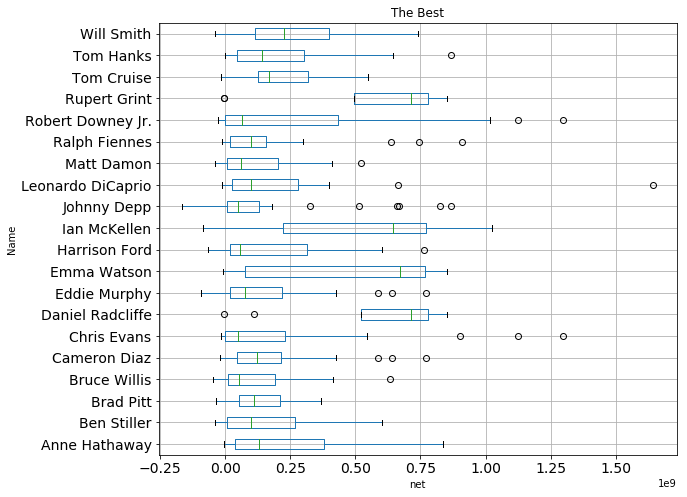

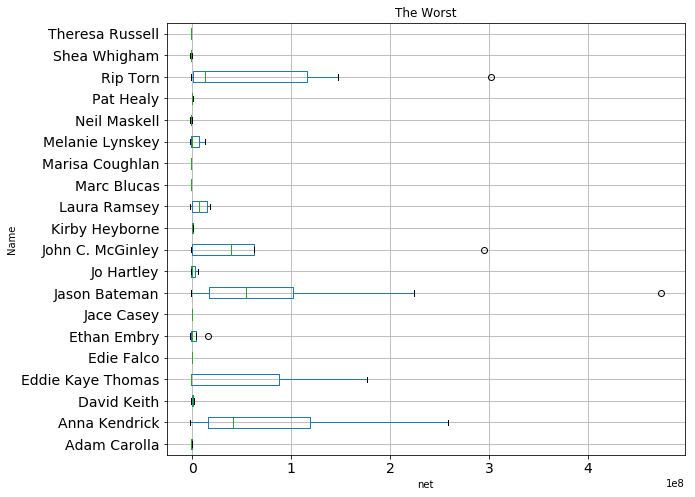

In [19]:
sum_top_working_actors, sum_worst_working_actors = eda.get_best_worst_personnel(actors_df, ('net', 'sum'))

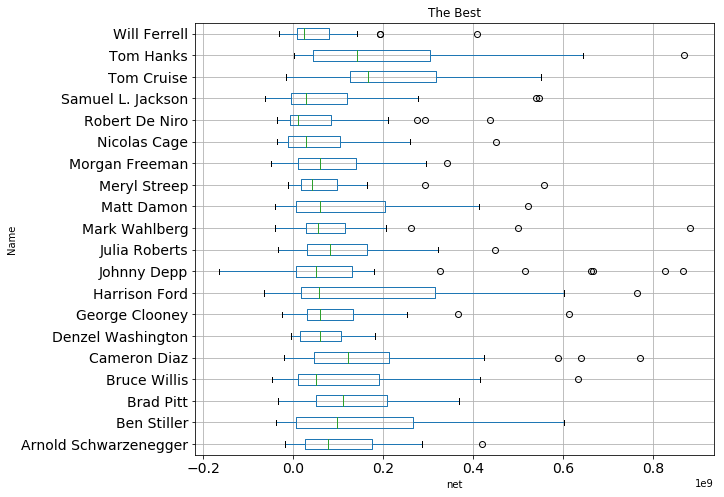

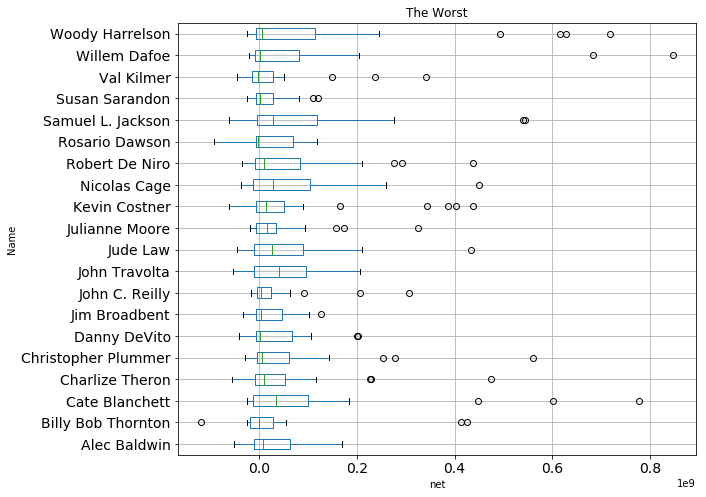

In [20]:
top_working_actors, worst_working_actors = eda.get_best_worst_personnel(actors_df, ('net', 'count'))

It is also surprising to see that some of the names associated with most amount of profitable movies also appear in the list of actors with the most amount of film flops (e.g., Samuel L Jackson and Robert DeNiro). For these actors, over the span of their entire career, they tend to bring a net positive. 

It will be interesting to investigate the profitability actors over time. Nicolas Cage, for example, had a string of major hits in the late 1990s (e.g. The Rock, Con-Air), and because less consistent as time went on -- as well as participating in some major flops. He was attached to a huge hit in The Croods, but it was an animated film and it's difficult to attribute the movie's success to Nicolas Cage's involvement.

In [21]:
data = []
for actor in top_working_actors:
    actor_history = actors_df[actors_df['name'] == actor].sort_values(by='release_date')
    trace = go.Scatter(x=actor_history['release_date'],y=actor_history['net'],text=actor_history['title'], name=actor)
    data.append(trace)

layout=go.Layout(title="Time History of Top Grossing Actors")
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [22]:
data = []
for actor in sum_worst_working_actors:
    actor_history = actors_df[actors_df['name'] == actor].sort_values(by='release_date')
    trace = go.Scatter(x=actor_history['release_date'],y=actor_history['net'],text=actor_history['title'], name=actor)
    data.append(trace)

layout=go.Layout(title="Time History of Lowest Grossing Actors")
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [25]:
actors_df = eda.split_release_date(actors_df)

In [32]:
actors_df[actors_df.gender == 0].head(2)

movie_id                  title    budget original_language  \
67        55          Amores perros   2000000                es   
74        59  A History of Violence  32000000                en   

                                             overview  popularity  \
67  Three different people in Mexico City are cata...   23.281616   
74  An average family is thrust into the spotlight...   34.628738   

   release_date   revenue  runtime    status      ...      vote_count  \
67   2000-06-16  20908467      154  Released      ...             521   
74   2005-09-23  60740827       96  Released      ...             832   

         net   net_pct             name  gender credits  net_to_date  \
67  18908467  9.454234  Alvaro Guerrero       0       0            0   
74  28740827  0.898151      Heidi Hayes       0       0            0   

    release_day  release_month  release_year  
67           16              6          2000  
74           23              9          2005  

[2 rows x 22 columns]

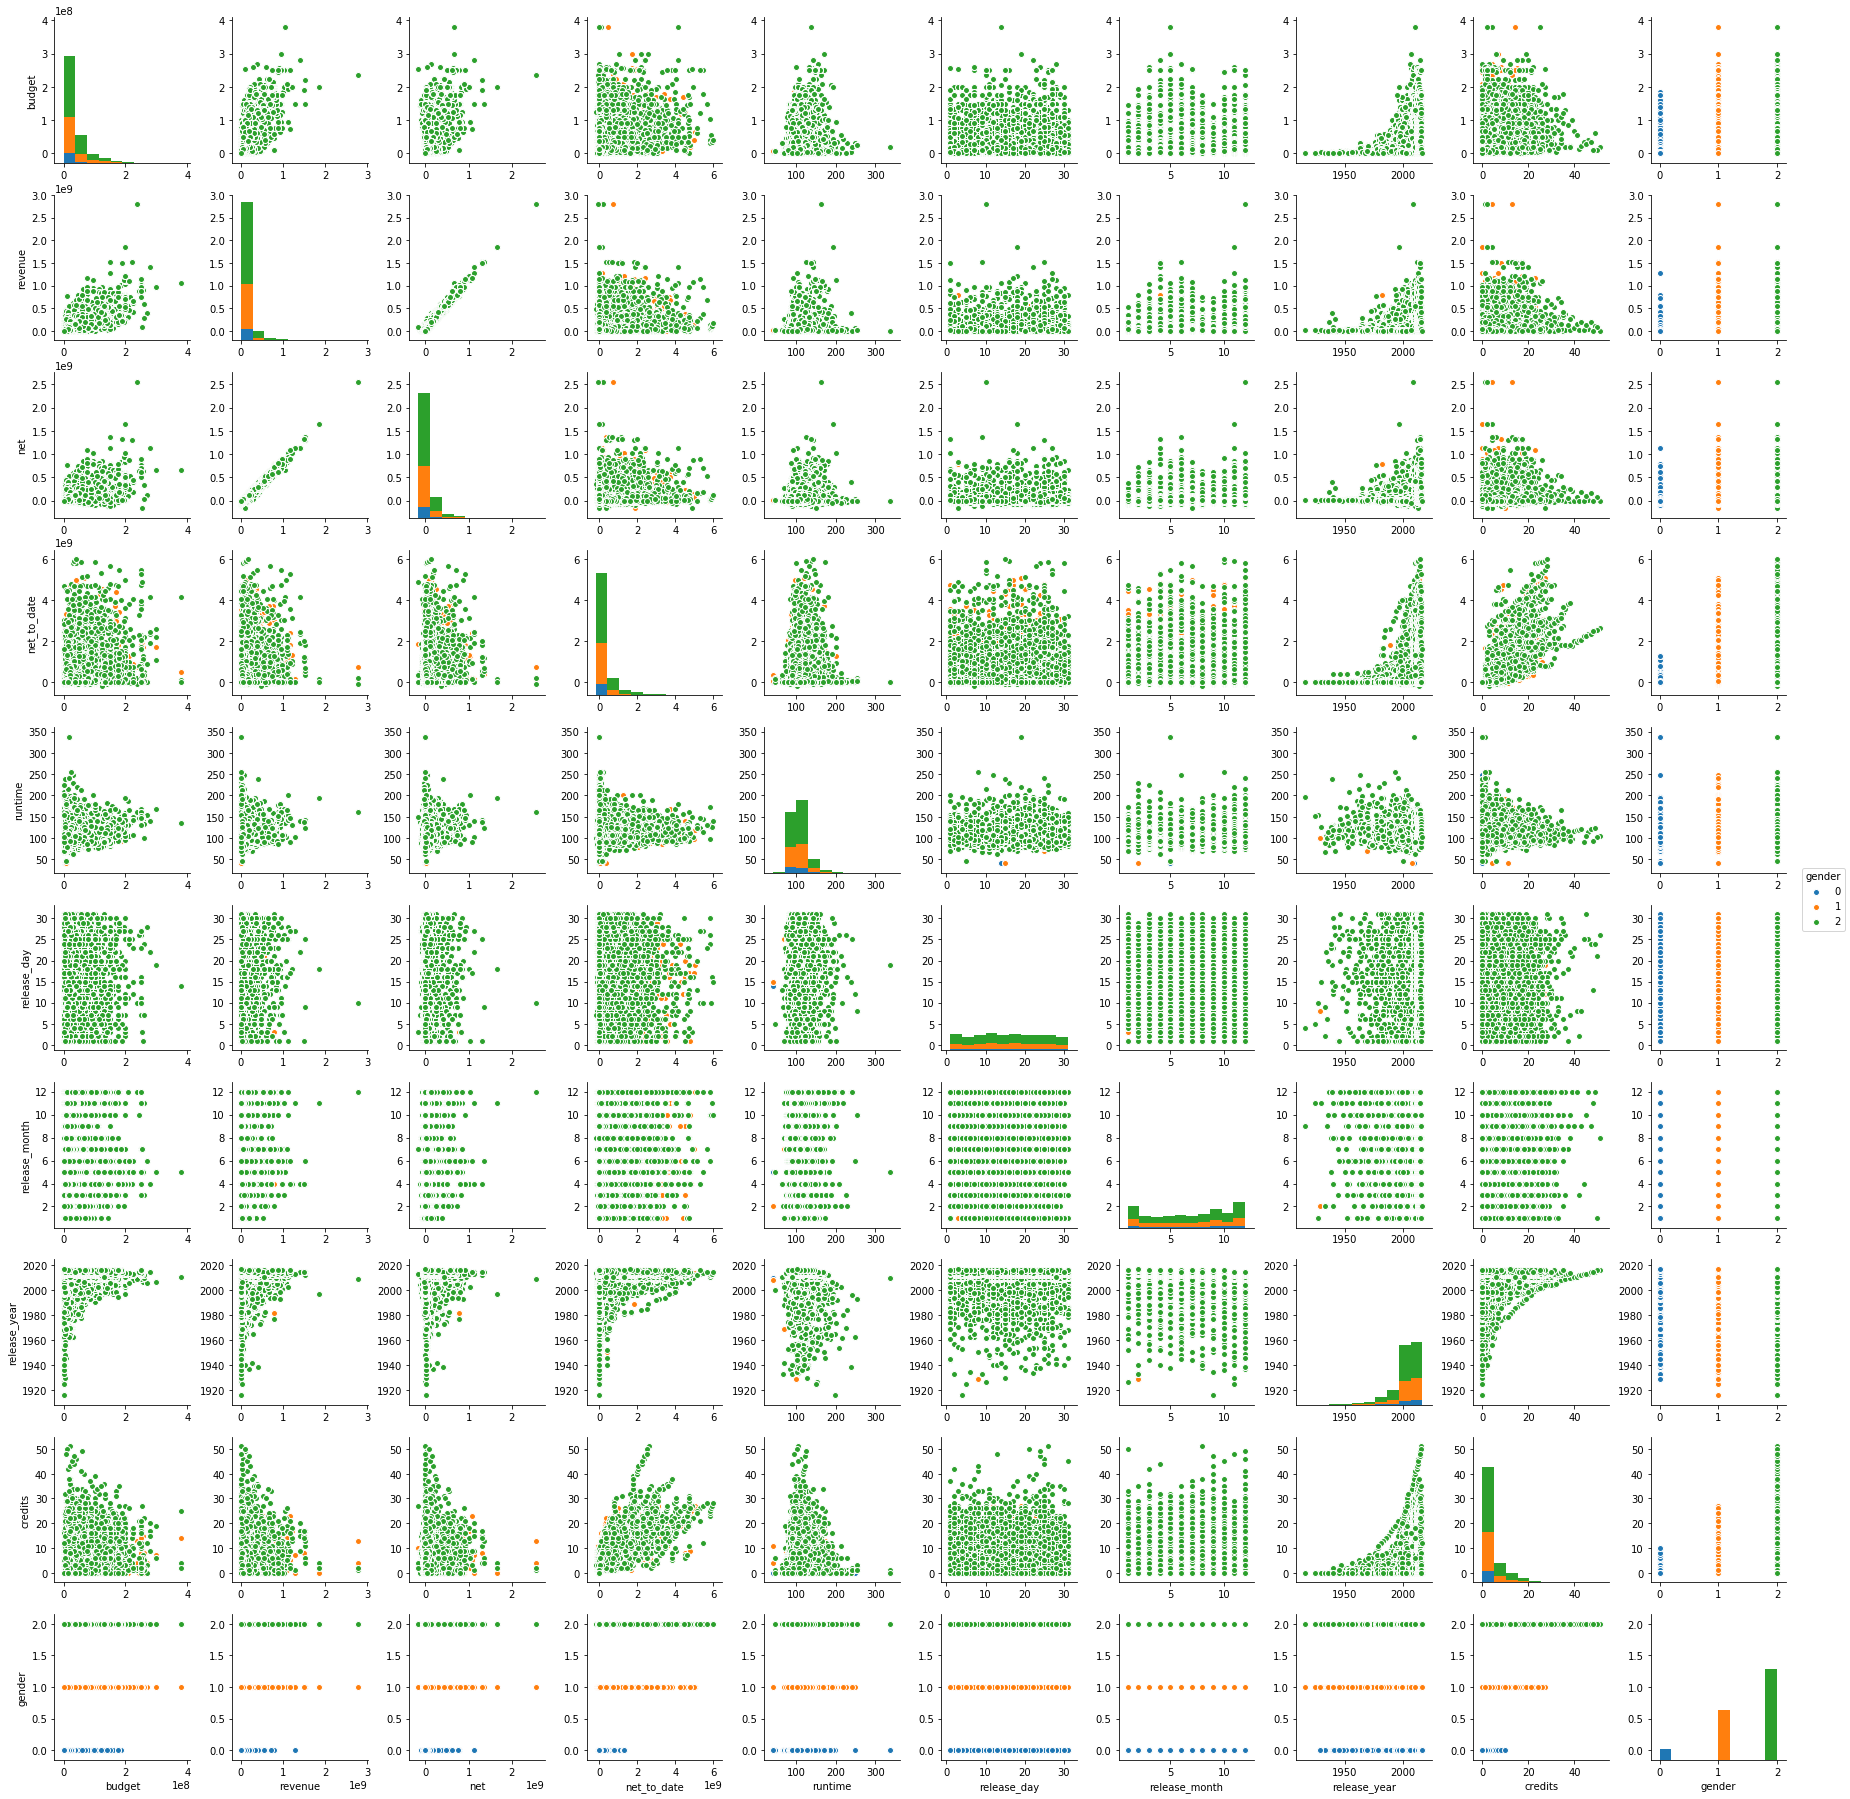

In [27]:
sns.pairplot(actors_df[[
    'budget', 'revenue','net', 'net_to_date','runtime',
    'release_day','release_month', 'release_year','credits', 'gender'
    ]], hue='gender')